In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Data file CSV
df = pd.read_csv("ispu_dki1.csv")

### Extraksi Data

In [103]:
def data ():
  print("====== Menampilkan 5 baris pertama ======")
  head = print(df.head())
  print("====== Memeriksa dimensi data ======")
  shape = print(df.shape)
  print("====== Menampilkan tipe data pada tiap kolom ======")
  info = print(df.info())
  print("//////////====== Memulai Explorasi Data ======////////////")
  print("====== Statistik Deskriptif ======")
  describe = print(df.describe())
  print ("====== Memeriksa missing value ======")
  isnull = print(df.isnull().sum())
  
  return head, shape, info, describe, isnull

In [104]:
data()

====== Menampilkan 5 baris pertama ======
      tanggal             stasiun  pm10  so2    co    o3   no2   max critical  \
0  2010-01-01  DKI1 (Bunderan HI)  60.0  4.0  73.0  27.0  14.0  73.0       CO   
1  2010-01-02  DKI1 (Bunderan HI)  32.0  2.0  16.0  33.0   9.0  33.0       O3   
2  2010-01-03  DKI1 (Bunderan HI)  27.0  2.0  19.0  20.0   9.0  27.0     PM10   
3  2010-01-04  DKI1 (Bunderan HI)  22.0  2.0  16.0  15.0   6.0  22.0     PM10   
4  2010-01-05  DKI1 (Bunderan HI)  25.0  2.0  17.0  15.0   8.0  25.0     PM10   

  categori  pm25  
0   SEDANG   NaN  
1     BAIK   NaN  
2     BAIK   NaN  
3     BAIK   NaN  
4     BAIK   NaN  
====== Memeriksa dimensi data ======
(4383, 11)
====== Menampilkan tipe data pada tiap kolom ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   stasiun   4383 non-null   ob

(None, None, None, None, None)

### Menangani Missing Value

In [4]:
# df_cleanup = df.dropna()

df_cleanup = df.dropna()

# print(df_cleanup.isnull().sum())
# print(df_cleanup.isnull().sum())

### Pembersihan Data

In [108]:
print(df_cleanup.head())
df_cleanup['tanggal'] = pd.to_datetime(df_cleanup['tanggal'], format="ISO8601")

         tanggal             stasiun  pm10   so2   co    o3   no2   max  \
4018  2021-01-01  DKI1 (Bunderan HI)  38.0  29.0  6.0  31.0  13.0  53.0   
4019  2021-01-02  DKI1 (Bunderan HI)  27.0  27.0  7.0  47.0   7.0  47.0   
4020  2021-01-03  DKI1 (Bunderan HI)  44.0  25.0  7.0  40.0  13.0  58.0   
4021  2021-01-04  DKI1 (Bunderan HI)  30.0  24.0  4.0  32.0   7.0  48.0   
4022  2021-01-05  DKI1 (Bunderan HI)  38.0  24.0  6.0  31.0   9.0  53.0   

     critical categori  pm25  
4018     PM25   SEDANG  53.0  
4019       O3     BAIK  46.0  
4020     PM25   SEDANG  58.0  
4021     PM25     BAIK  48.0  
4022     PM25   SEDANG  53.0  


C:\Users\mukhl\AppData\Local\Temp\ipykernel_17252\1623770844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanup['tanggal'] = pd.to_datetime(df_cleanup['tanggal'], format="ISO8601")


### Visualisasi Data

<!-- Visualisasi Data -->

In [3]:
df_cleanup.head()
print(df.columns)

NameError: name 'df_cleanup' is not defined

In [3]:
kategori_counts = df.groupby('categori').size()
print(kategori_counts)

categori
BAIK              1054
SEDANG            3065
TIDAK ADA DATA     110
TIDAK SEHAT        154
dtype: int64


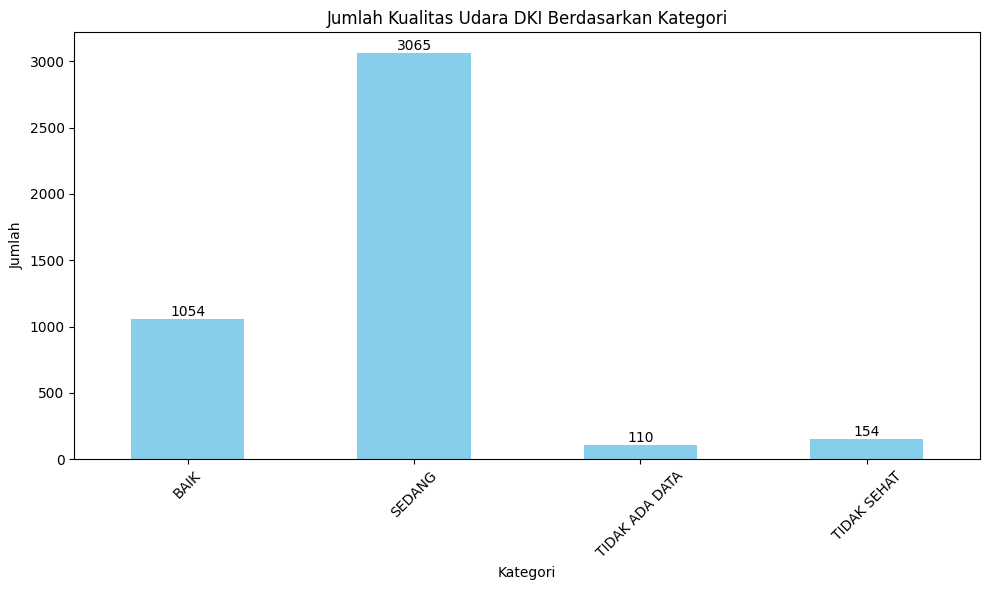

In [25]:
# Membuat histogram
plt.figure(figsize=(10, 6))
bars = kategori_counts.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Kualitas Udara DKI Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')

# Menambahkan anotasi pada setiap batang
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Menampilkan grafik
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


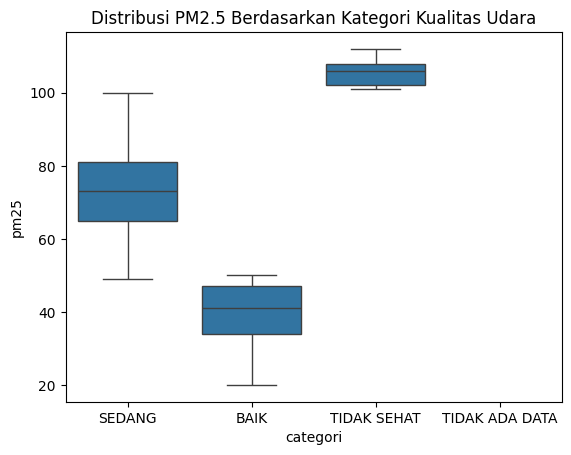

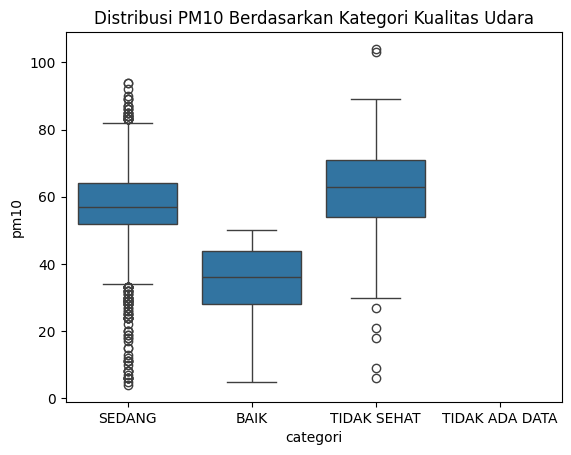

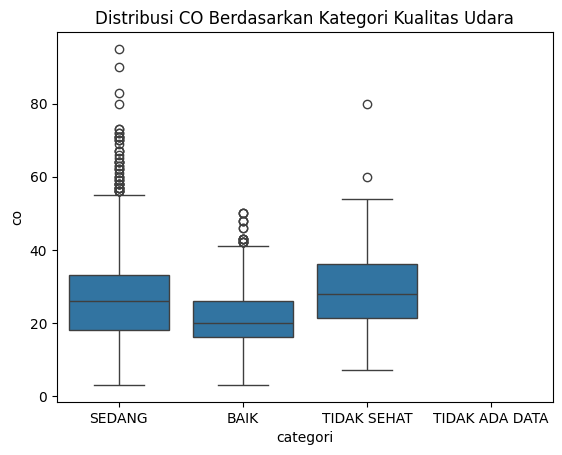

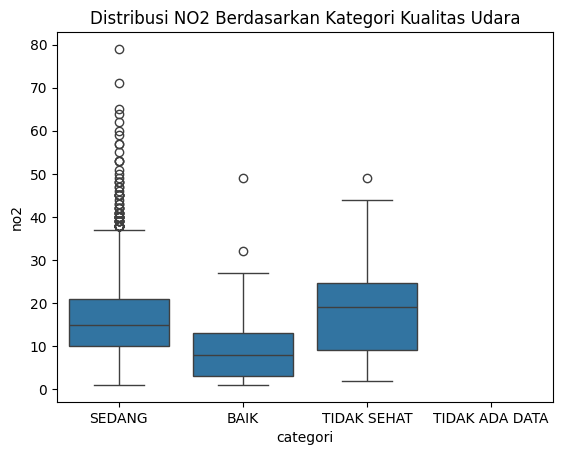

In [17]:
# Membuat boxplot berdasarkan kategori
sns.boxplot(x='categori', y='pm25', data=df)
plt.title('Distribusi PM2.5 Berdasarkan Kategori Kualitas Udara')
plt.show()

sns.boxplot(x='categori', y='pm10', data=df)
plt.title('Distribusi PM10 Berdasarkan Kategori Kualitas Udara')
plt.show()

sns.boxplot(x='categori', y='co', data=df)
plt.title('Distribusi CO Berdasarkan Kategori Kualitas Udara')
plt.show()

sns.boxplot(x='categori', y='no2', data=df)
plt.title('Distribusi NO2 Berdasarkan Kategori Kualitas Udara')
plt.show()

<!-- Line Plot -->

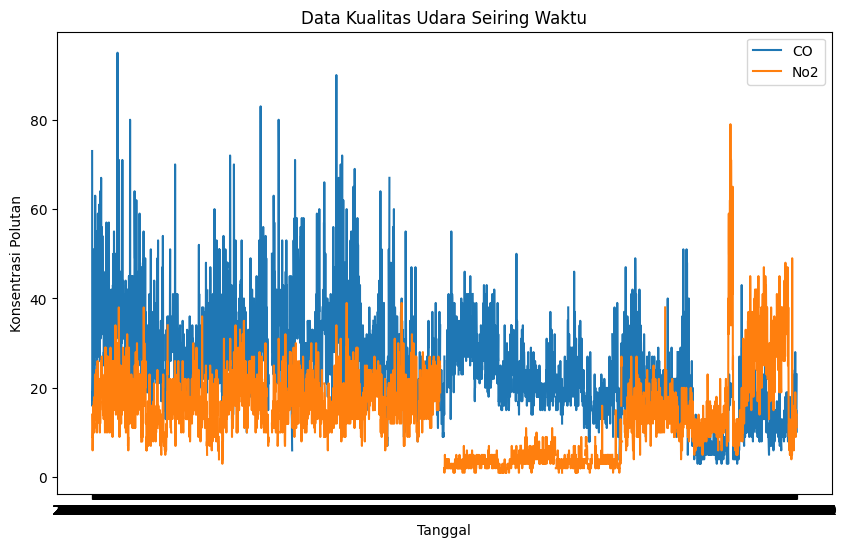

In [14]:
# Membuat line plot untuk analisis waktu
plt.figure(figsize=(10,6))
plt.plot(df['tanggal'], df['co'], label='CO')
plt.plot(df['tanggal'], df['no2'], label='No2')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi Polutan')
plt.title('Data Kualitas Udara Seiring Waktu')
plt.legend()
plt.show()

<!-- Pair Plot -->

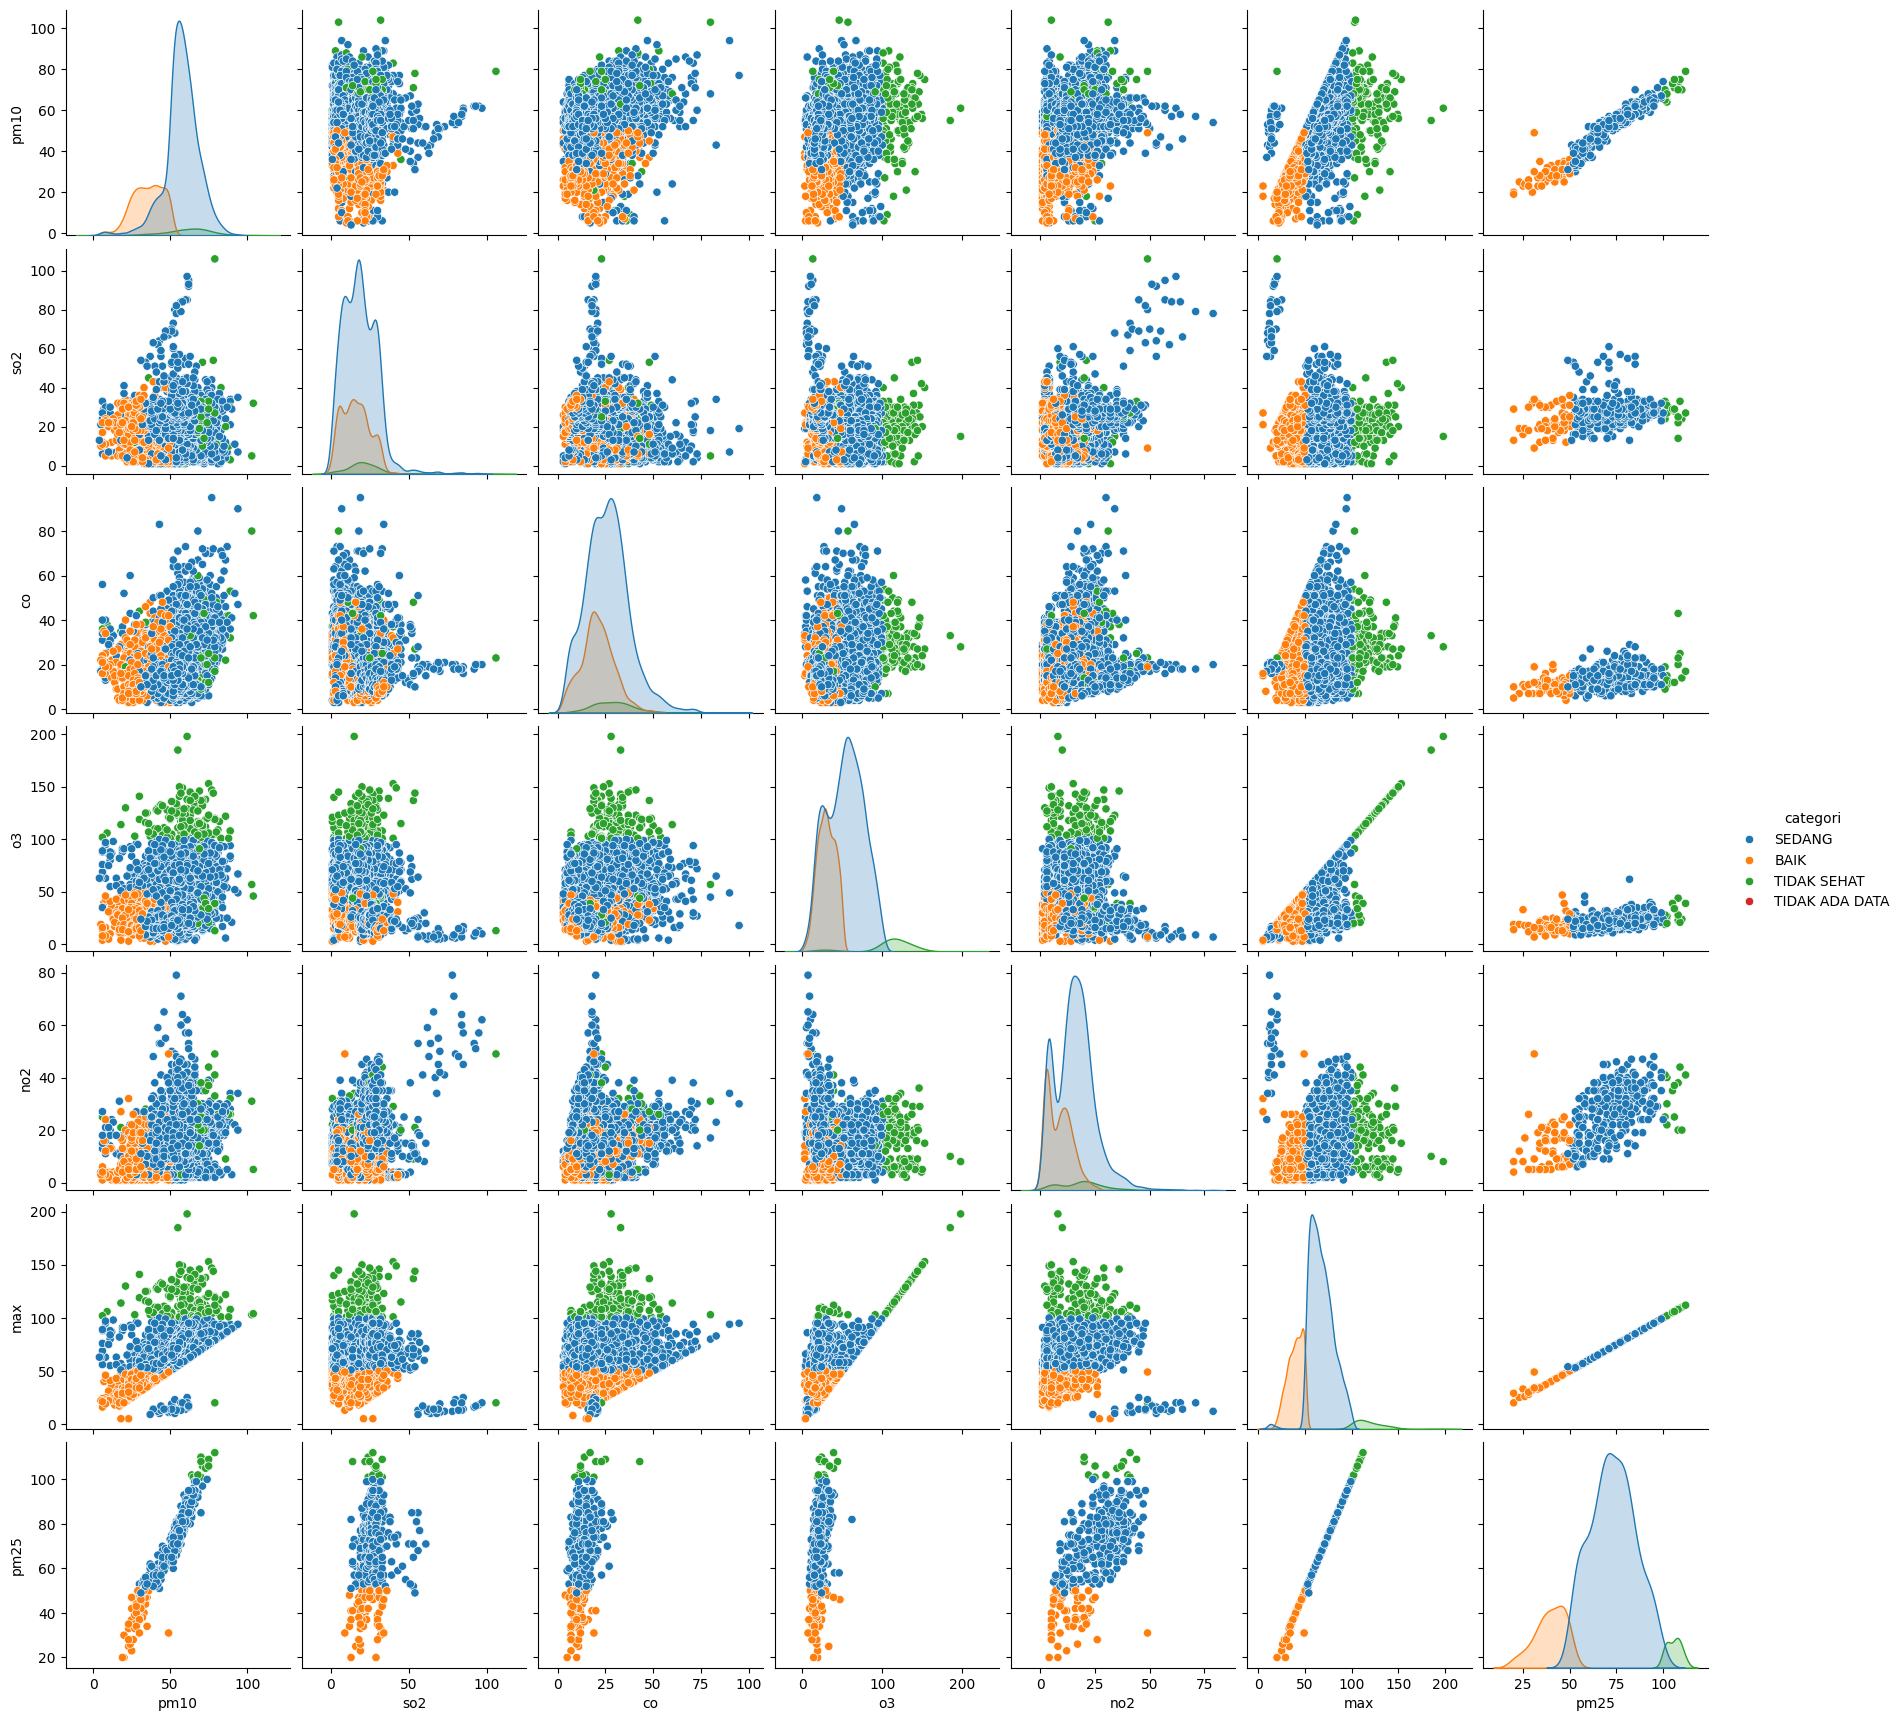

In [15]:
# Membuat pairplot untuk melihat hubungan antar variabel
sns.pairplot(df, hue='categori')
plt.show()

<!-- Correlation Plot Heatmap -->

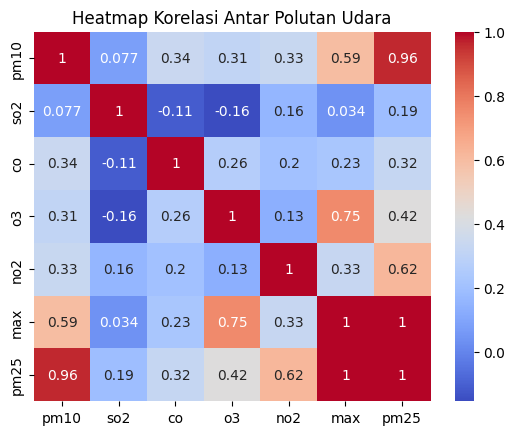

In [21]:
# Menghitung korelasi antar kolom, kecuali kolom 'tanggal', 'stasiun', 'critical' dan 'categori'
correlation_matrix = df.drop(['tanggal', 'stasiun', 'critical', 'categori'], axis=1).corr()

# Membuat heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Polutan Udara')
plt.show()

#### Customizing Plot in Matplotlob and Seaborn

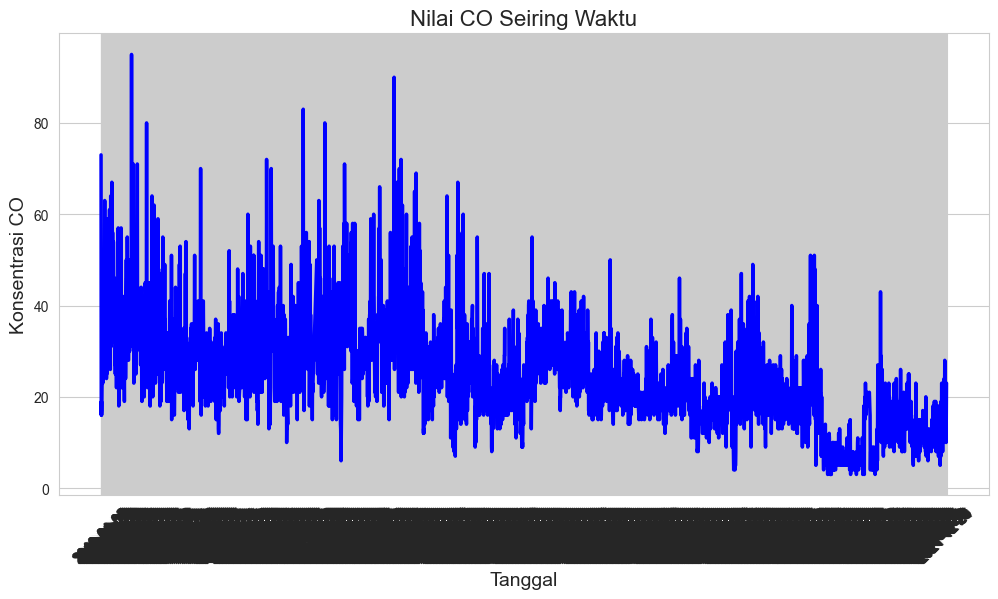

In [28]:
# Mengatur ukuran plot
plt.figure(figsize=(12, 6))

# Menggunakan style seaborn
sns.set_style("whitegrid")

# Membuat line plot dengan warna dan gaya khusus
sns.lineplot(x='tanggal', y='co', data=df, color='blue', linewidth=2.5)
plt.title('Nilai CO Seiring Waktu', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Konsentrasi CO', fontsize=14)
plt.xticks(rotation=45)
plt.show()


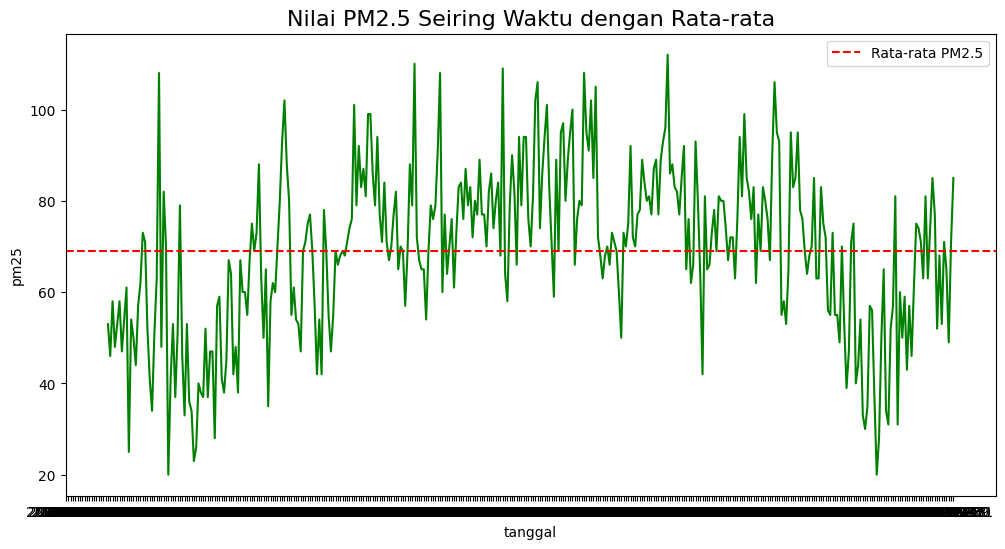

In [16]:
# Menambahkan anotasi ke plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='tanggal', y='pm25', data=df, color='green')

# Menambahkan anotasi
plt.axhline(y=df['pm25'].mean(), color='red', linestyle='--', label='Rata-rata PM2.5')
plt.text(df['tanggal'].iloc[300], df['pm25'].mean()+1, s='', color='red')

plt.title('Nilai PM2.5 Seiring Waktu dengan Rata-rata', fontsize=16)
plt.legend()
plt.show()


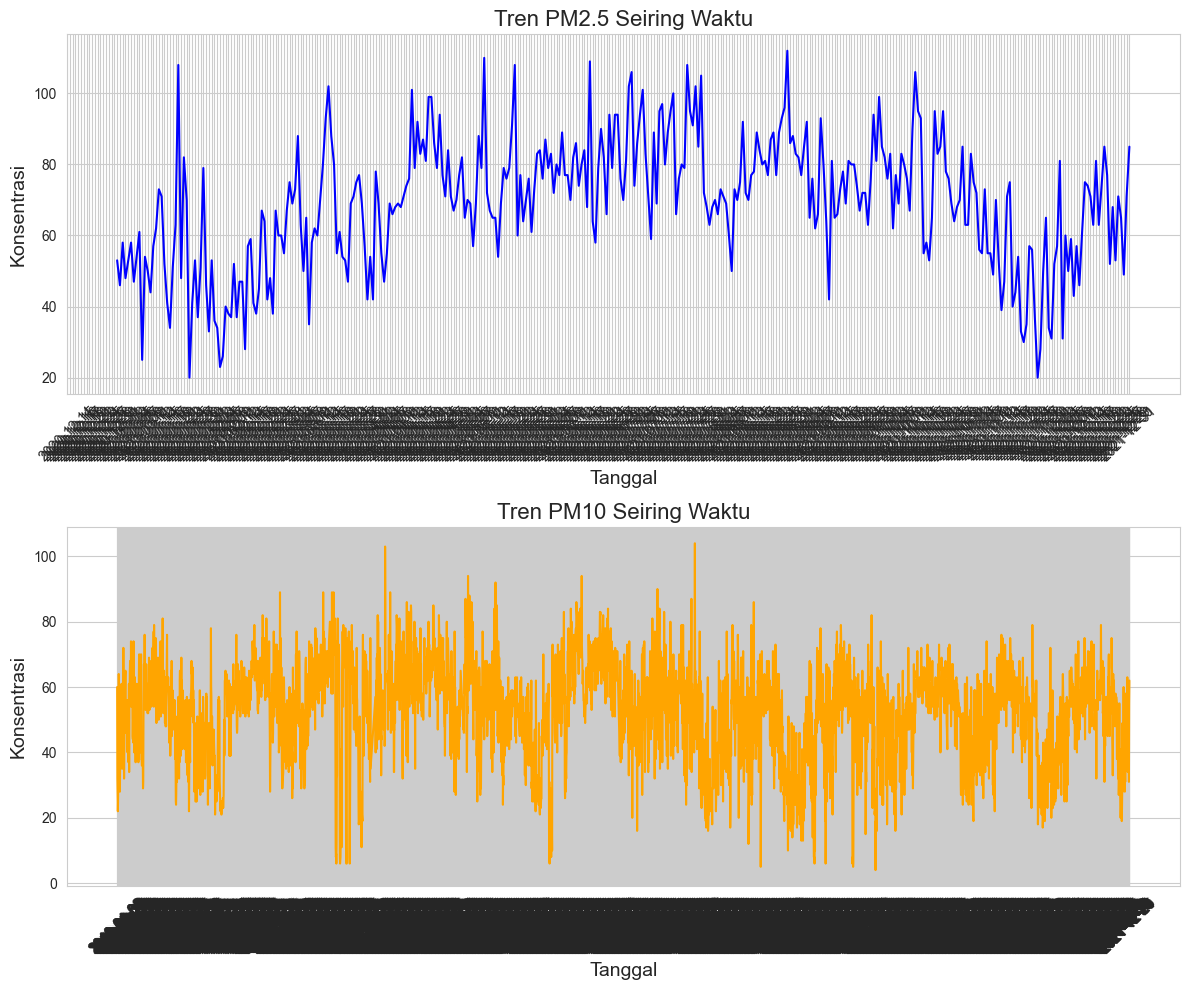

In [36]:
# Membuat beberapa subplot dalam satu gambar
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.lineplot(x='tanggal', y='pm25', data=df, ax=axes[0], color='blue')
axes[0].set_title('Tren PM2.5 Seiring Waktu', fontsize=16)

sns.lineplot(x='tanggal', y='pm10', data=df, ax=axes[1], color='orange')
axes[1].set_title('Tren PM10 Seiring Waktu', fontsize=16)

for ax in axes:
    ax.set_xlabel('Tanggal', fontsize=14)
    ax.set_ylabel('Konsentrasi', fontsize=14)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Interactive Plot using Plotly

In [15]:
import plotly.express as px

# Membuat line plot interaktif dengan Plotly
fig = px.line(df, x='tanggal', y='categori', title='Kategori Kualitas Udara Interaktif')
fig.update_xaxes(rangeslider_visible=True)
fig.show()


In [8]:
# 3D Visualize
fig = px.scatter_3d(df, x='pm10', y='pm25', z='co', color='categori',
                    title='Visualisasi 3D Polutan Udara')
fig.show()


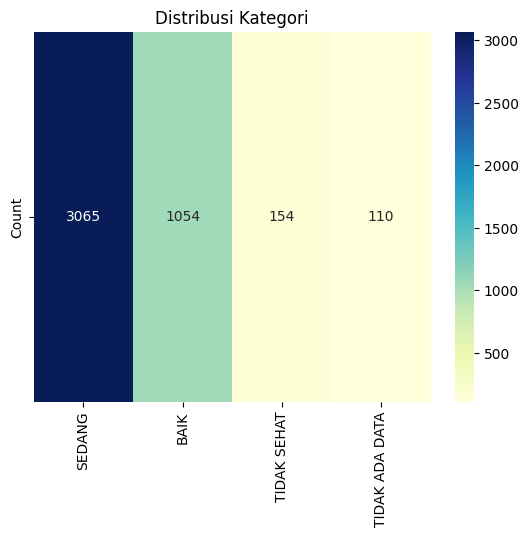

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh visualisasi heatmap berdasarkan kategori
category_counts = df['categori'].value_counts()
sns.heatmap(category_counts.values.reshape(1, -1), annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=category_counts.index, yticklabels=['Count'])
plt.title('Distribusi Kategori')
plt.show()

# Analisis Statistik dan Inferensi

#### Explorasi Data

In [13]:
print(df.head())
print("======================================")
print(df.info())
print("======================================")
print(df.describe())
print("=============== Menghitung Mean, Median dan Standar Deviasi ================")
# Menghitung mean
mean_values = df['co'].mean()
print("Mean:\n", mean_values)

# Menghitung median
median_values = df['co'].median()
print("Median:\n", median_values)

# Menghitung standar deviasi
std_dev = df['co'].std()
print("Standar Deviasi:\n", std_dev)


      tanggal             stasiun  pm10  so2    co    o3   no2   max critical  \
0  2010-01-01  DKI1 (Bunderan HI)  60.0  4.0  73.0  27.0  14.0  73.0       CO   
1  2010-01-02  DKI1 (Bunderan HI)  32.0  2.0  16.0  33.0   9.0  33.0       O3   
2  2010-01-03  DKI1 (Bunderan HI)  27.0  2.0  19.0  20.0   9.0  27.0     PM10   
3  2010-01-04  DKI1 (Bunderan HI)  22.0  2.0  16.0  15.0   6.0  22.0     PM10   
4  2010-01-05  DKI1 (Bunderan HI)  25.0  2.0  17.0  15.0   8.0  25.0     PM10   

  categori  pm25  
0   SEDANG   NaN  
1     BAIK   NaN  
2     BAIK   NaN  
3     BAIK   NaN  
4     BAIK   NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   stasiun   4383 non-null   object 
 2   pm10      4171 non-null   float64
 3   so2       4208 non-null   float64
 4   co        4233 non-null   float64
 5   o3        4180

#### Visualisasi Distribusi Data

=============== HEATMAP ==================


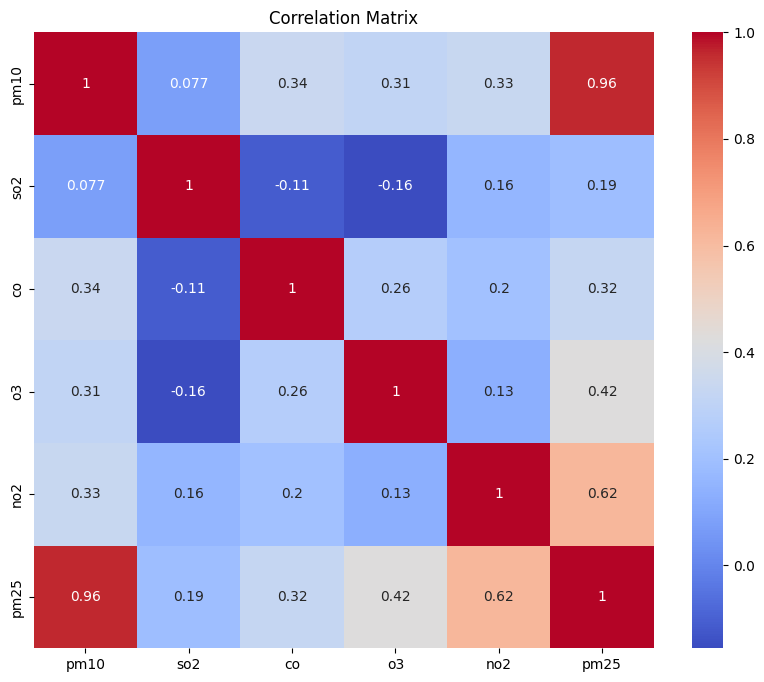

In [36]:
columns_to_plot = ['pm10', 'so2', 'co', 'o3', 'no2', 'pm25']  # Sesuaikan dengan kolom yang ingin Anda plot
def histogram():
  # Menentukan kolom mana yang akan divisualisasikan
  print("=============== HISTOGRAM ==================")

  # Membuat subplots
  fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # 2 baris dan 3 kolom

  # Loop untuk membuat histogram per kolom
  for i, column in enumerate(columns_to_plot):
      row = i // 3  # Menghitung baris
      col = i % 3   # Menghitung kolom
      axs[row, col].hist(df[column].dropna(), bins=20)
      axs[row, col].set_title(f'Distribusi {column}')
      axs[row, col].set_xlabel(column)
      axs[row, col].set_ylabel('Frekuensi')

  # Menyesuaikan layout
  plt.tight_layout()

  # Menampilkan plot
  plt.show()

def boxplot():
  print("=============== BOXPLOT ==================")
  # Membuat subplots
  fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

  # Loop untuk membuat boxplot per kolom
  for i, column in enumerate(columns_to_plot):
      row = i // 3
      col = i % 3
      axs[row, col].boxplot(df[column].dropna())
      axs[row, col].set_title(f'{column}')
      axs[row, col].set_ylabel(column)

  # Menyesuaikan layout
  plt.tight_layout()
  plt.show()

def scatterPlot():
  print("=============== SCATTER PLOT ==================")
  # Membuat subplots
  fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

  # Loop untuk membuat scatter plot per kolom dengan 'pm10'
  for i, column in enumerate(columns_to_plot[1:]):  # Mulai dari kolom kedua
      row = i // 3
      col = i % 3
      axs[row, col].scatter(df['co'], df['co'].dropna(), alpha=0.5)
      axs[row, col].set_title(f'CO vs PM10')
      axs[row, col].set_xlabel('PM10')
      axs[row, col].set_ylabel(column)

  # Menyesuaikan layout
  plt.tight_layout()
  plt.show()

def lineplot():
  # Membuat subplots
  fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

  # Loop untuk membuat line plot per kolom
  for i, column in enumerate(columns_to_plot):
      row = i // 3
      col = i % 3
      axs[row, col].plot(df['tanggal'], df[column].dropna(), marker='o', linestyle='-')
      axs[row, col].set_title(f'{column} over Time')
      axs[row, col].set_xlabel('Tanggal')
      axs[row, col].set_ylabel(column)
      axs[row, col].tick_params(axis='x', rotation=45)  # Memutar label sumbu x agar lebih terbaca

  # Menyesuaikan layout
  plt.tight_layout()
  plt.show()

def pairplot():
  print("=============== PAIRPLOT ==================")
  sns.pairplot(df[columns_to_plot])
  plt.show()

def heatmap():
  print("=============== HEATMAP ==================")
  # Menghitung korelasi
  corr = df[columns_to_plot].corr()

  # Membuat heatmap
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr, annot=True, cmap='coolwarm')
  plt.title('Correlation Matrix')
  plt.show()

# histogram()
# boxplot()
# scatterPlot()
# lineplot()
# pairplot()
heatmap()
